In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"navjeet69","key":"491193145107e1fa28f250bf3940adbd"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            447  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           2512  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           1479  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59            157  
nehaprabhavalkar/india

In [ ]:
!kaggle datasets download -d ahmedmoorsy/facial-expression

 96% 185M/193M [00:01<00:00, 97.0MB/s]
100% 193M/193M [00:01<00:00, 114MB/s] 


In [ ]:
! mkdir data

In [ ]:
!unzip facial-expression.zip -d data

Archive:  facial-expression.zip
  inflating: data/fer2013.csv        
  inflating: data/fer2013/fer2013.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file = open('data/fer2013.csv', 'r')
cnt = 0
final = []
for line in file:
    cnt += 1
    if cnt > 1:
        p = list(line.split(','))
        k = list(map(int, p[1].split()))
        final.append([int(p[0])])
        final[-1].append(k)

In [ ]:
len(final)

35887

In [ ]:
images = []
labels = []
for i in final:
    labels.append(i[0])
    p = np.array(i[1])
    p = p.reshape((48,48))
    p = list(p)
    images.append(p)

In [ ]:
images = np.array(images)

In [ ]:
images.shape

(35887, 48, 48)

4

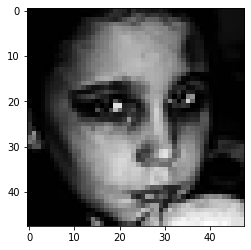

In [ ]:
i = 20
plt.imshow(images[i], cmap='gray')
labels[i]

In [ ]:
labels = np.array(labels)

In [ ]:
labels = labels.reshape(35887, 1)
images = images.reshape(35887, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

array([5])

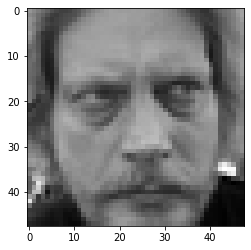

In [ ]:
i = 69
plt.imshow(X_train[i].reshape(48, 48), cmap='gray')
labels[i]

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
X_train_rgb = np.ndarray(shape=(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)) 
X_train_rgb[:, :, :, 0] = X_train[:, :, :, 0]
X_train_rgb[:, :, :, 1] = X_train[:, :, :, 0]
X_train_rgb[:, :, :, 2] = X_train[:, :, :, 0]
X_test_rgb = np.ndarray(shape=(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)) 
X_test_rgb[:, :, :, 0] = X_test[:, :, :, 0]
X_test_rgb[:, :, :, 1] = X_test[:, :, :, 0]
X_test_rgb[:, :, :, 2] = X_test[:, :, :, 0]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Lambda, Dense, Flatten

In [ ]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=[48, 48, 3])

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten() (vgg.output)
prediction = Dense(7, activation='softmax') (x)

In [ ]:
model = keras.models.Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train_rgb, y_train_final, epochs=50, validation_data=(X_test_rgb, y_test_final) )

Epoch 1/50
898/898 [==============================] - 29s 32ms/step - loss: 1.5051 - accuracy: 0.4279 - val_loss: 1.5593 - val_accuracy: 0.3975
Epoch 2/50
898/898 [==============================] - 29s 32ms/step - loss: 1.5048 - accuracy: 0.4272 - val_loss: 1.5512 - val_accuracy: 0.4040
Epoch 3/50
898/898 [==============================] - 28s 32ms/step - loss: 1.5034 - accuracy: 0.4299 - val_loss: 1.5550 - val_accuracy: 0.4037
Epoch 4/50
898/898 [==============================] - 28s 31ms/step - loss: 1.5016 - accuracy: 0.4309 - val_loss: 1.5589 - val_accuracy: 0.3961
Epoch 5/50
898/898 [==============================] - 28s 31ms/step - loss: 1.5010 - accuracy: 0.4304 - val_loss: 1.5760 - val_accuracy: 0.3908
Epoch 6/50
898/898 [==============================] - 28s 31ms/step - loss: 1.5007 - accuracy: 0.4324 - val_loss: 1.5831 - val_accuracy: 0.3887
Epoch 7/50
898/898 [==============================] - 28s 31ms/step - loss: 1.4999 - accuracy: 0.4320 - val_loss: 1.5621 - val_accuracy:

In [ ]:
y_train.shape

(28709, 1)

In [ ]:
y_train = y_train.reshape(28709,)

In [ ]:
X_train_rgb.shape

(28709, 48, 48, 3)

In [ ]:
y_train

array([4, 6, 3, ..., 4, 0, 4])

In [ ]:
y_train = list(y_train)

In [ ]:
y_train_final = [[0, 0, 0, 0, 0, 0, 0] for i in range(28709)]
for i in range(28709):
  y_train_final[i][y_train[i]] = 1

In [ ]:
y_train_final = np.array(y_train_final)

In [ ]:
y_train_final.shape

(28709, 7)

In [ ]:
y_train_final[0]

array([0, 0, 0, 0, 1, 0, 0])

In [ ]:
X_train_rgb[0].shape

(48, 48, 3)

In [ ]:
y_test = list(y_test)
y_test_final = [[0, 0, 0, 0, 0, 0, 0] for i in range(7178)]
for i in range(7178):
  y_test_final[i][y_test[i]] = 1
y_test_final = np.array(y_test_final)

In [ ]:
y_test = np.array(y_test)
y_test = y_test.reshape(7178, )
y_test = list(y_test)

In [ ]:
y_test_final.shape

(7178, 7)